# Gradient Boosting Decision Trees


In [1]:
import warnings 
warnings.filterwarnings ("ignore")

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from utils import visualize_classifier, visualize_tree_sklearn, visualize_tree_lightgbm

print(f"Numpy version:{np.__version__}")
print(f"Pandas version:{pd.__version__}")
print(f"Sklearn version:{sklearn.__version__}")
print(f"LightGBM version:{lgb.__version__}")

Numpy version:1.22.3
Pandas version:1.4.1
Sklearn version:1.0.2
LightGBM version:3.3.2


## Decision Trees

A Decision Tree is a machine learning algorithm that can be used for classification or regression. The intiution behind Decision Trees is that you split the data into regions until all data points belong to each class is inside their own region.

Some details of Decision Trees:
* DT models are fairly intuitive and easy to explain to business.
* DT cut feature space in rectangles [or (hyper)cuboids].
* DT any number of categorical variables are not really an issue.
* DT overfit easily. To solve that, you can use Random Forest or Boosted Decision Trees.
* No need to normalize the features.

To train a Decision Tree we optimize a loss function that finds the optimal split. The optimal split is the one that minimizes the classification error. This is measured in terms of "purity", a pure node happens when all the elements in the node are of one unique class. There are two ways of measuring the purity of a node, using the **Gini index** or using **entropy**.

#### Gini index:

The Gini index is defined:

$$
Gini (node) = \sum_{k=1}^c p_k(1-p_k) 
$$

where $p_k$ is the probability of picking a data poing from class k.

Details:
* Gini is a measure of variance in the node.
* Gini is high if there are many data points belonging to the wrong class.
* Gini is zero if all the data points belong to the same class. 
* Gini is faster to compute than Entroypy.
* Also used in economics to measure inequality.

#### Entropy

The entropy is defined as:

$$
Entropy (node) = \sum_{k=1}^c p_k log_2 (p_k)
$$

where $p_k$ is the probability of picking a data poing from class k.

Details:
* Entropy is a measure of uncertainty in the node.
* Entropy is high if there are many data points belonging to the wrong class.
* Entropy is zero if all the data points belong to the same class. 
* Entropy is slower to compute than Gini.
* It is used in statistics to measure the expected amount of information that can be drown from a distribution.


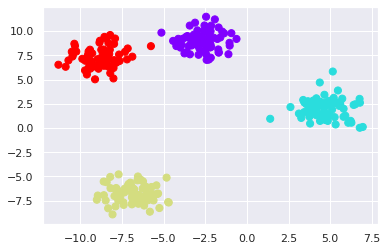

In [2]:
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [3]:
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=1)

In [4]:
model = model.fit(X, y)
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 1
Number of leaves: 2


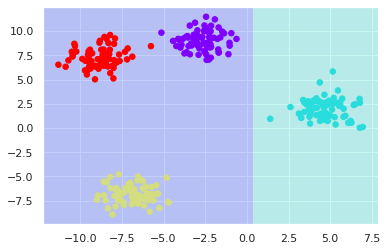

In [5]:
visualize_classifier(model, X, y)

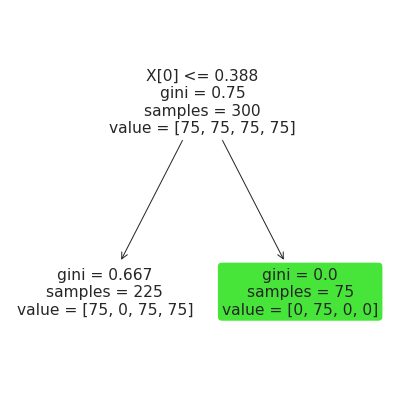

In [6]:
visualize_tree_sklearn(model)

In [7]:
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=2)

In [8]:
model = model.fit(X, y)
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 2
Number of leaves: 3


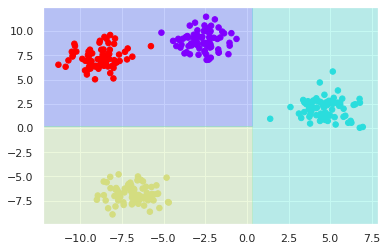

In [9]:
visualize_classifier(model, X, y)

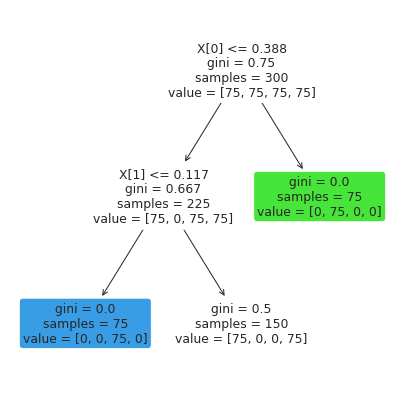

In [10]:
visualize_tree_sklearn(model)

In [11]:
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=None)

In [12]:
model = model.fit(X, y)
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 3
Number of leaves: 4


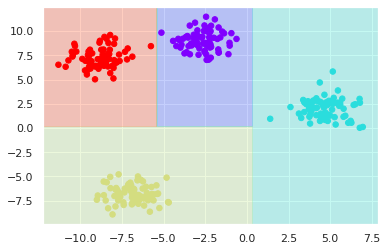

In [13]:
visualize_classifier(model, X, y)

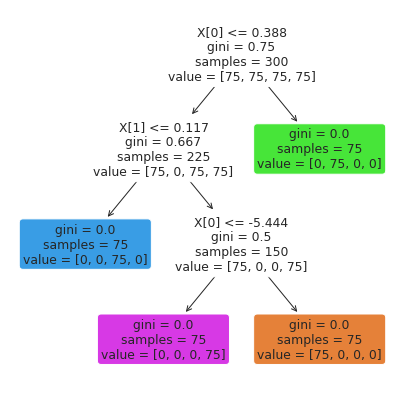

In [14]:
visualize_tree_sklearn(model)

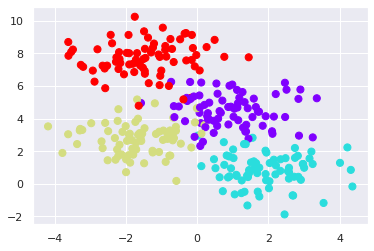

In [15]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [16]:
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=None)

In [17]:
model = model.fit(X, y)
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 10
Number of leaves: 24


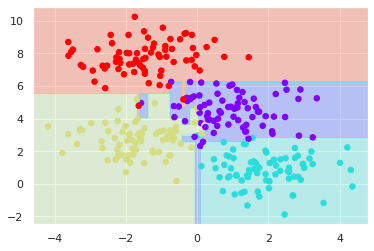

In [18]:
visualize_classifier(model, X, y)

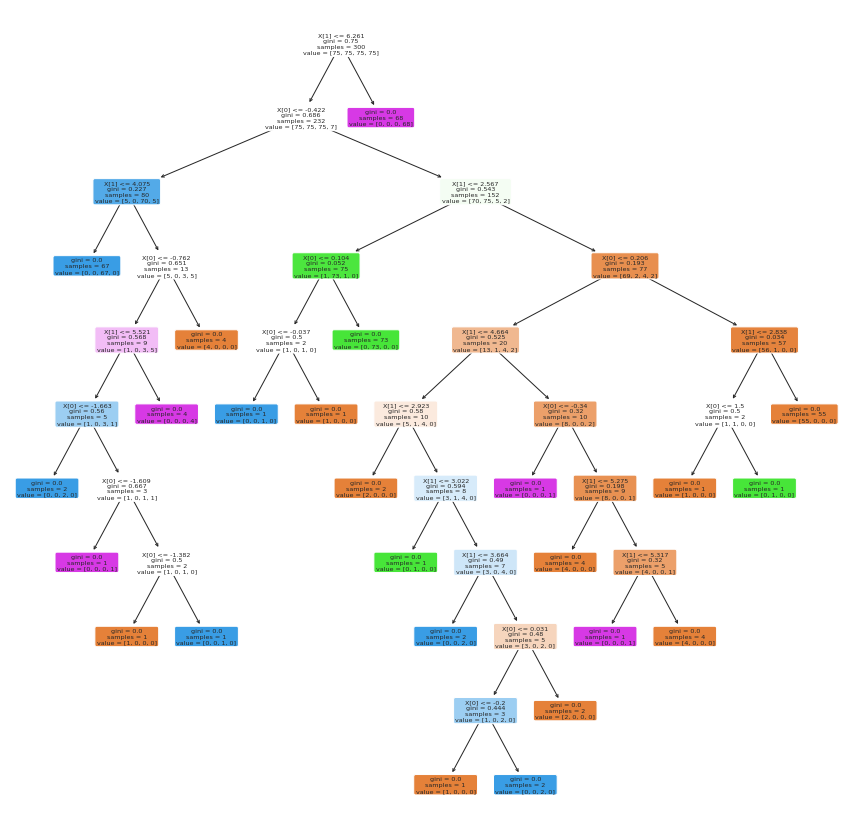

In [19]:
visualize_tree_sklearn(model, figsize=(15,15))

Tree depth: 3
Number of leaves: 5


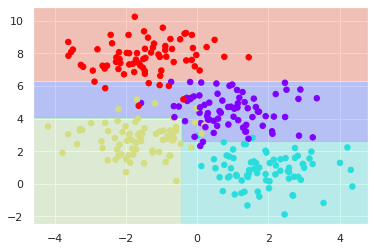

In [36]:
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
model = model.fit(X, y)
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")
visualize_classifier(model, X, y)

## LightGBM

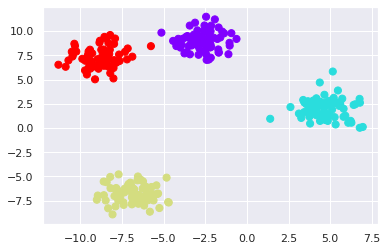

In [20]:
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [21]:
model = lgb.LGBMClassifier(boosting_type="gbdt", random_state=42, max_depth=None)

In [22]:
model = model.fit(X, y)

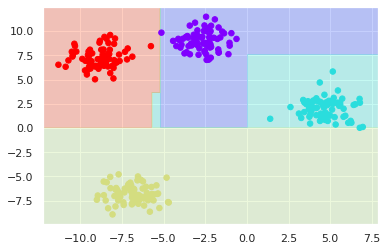

In [23]:
visualize_classifier(model, X, y)

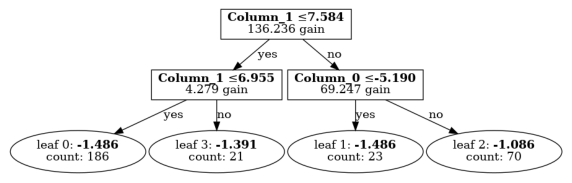

In [24]:
visualize_tree_lightgbm(model)

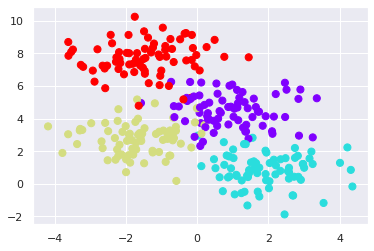

In [25]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [26]:
model = lgb.LGBMClassifier(boosting_type="gbdt", random_state=42, max_depth=None)

In [27]:
model = model.fit(X, y)

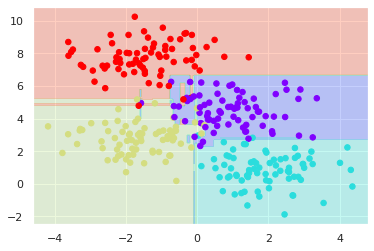

In [28]:
visualize_classifier(model, X, y)

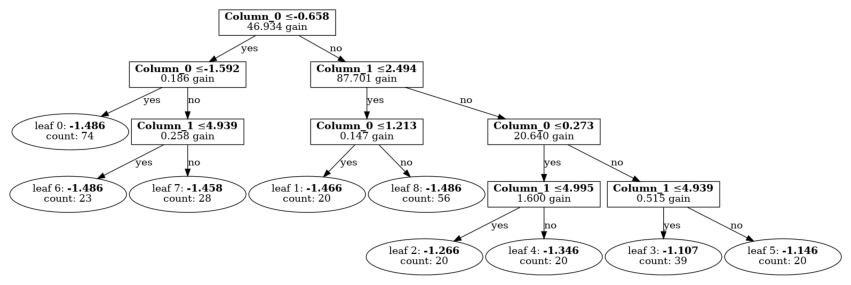

In [29]:
visualize_tree_lightgbm(model, figsize=(15,15))

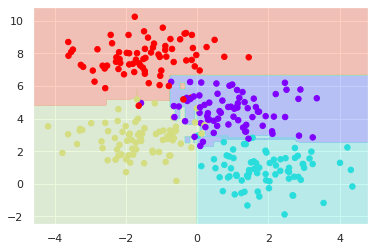

In [39]:
model = lgb.LGBMClassifier(boosting_type="gbdt", random_state=42, max_depth=2)
model = model.fit(X, y)
visualize_classifier(model, X, y)

## References
* Decision Trees vs LightGBM experiments: https://mljar.com/machine-learning/decision-tree-vs-lightgbm/
* Lessons Learned From Benchmarking Fast Machine Learning Algorithms
 https://docs.microsoft.com/en-us/archive/blogs/machinelearning/lessons-learned-benchmarking-fast-machine-learning-algorithms
* Decision Tree Learning https://en.wikipedia.org/wiki/Decision_tree_learning
* Gradient Boosting https://en.wikipedia.org/wiki/Gradient_boosting

Object `lgb.LGBMClassifier` not found.
